In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv.imread('starry_night.jpg')
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

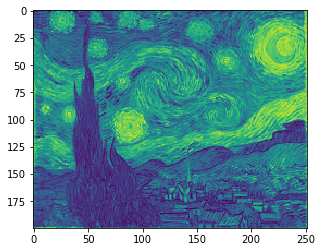

In [4]:
plt.imshow(gray)
plt.show()

In [5]:
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)

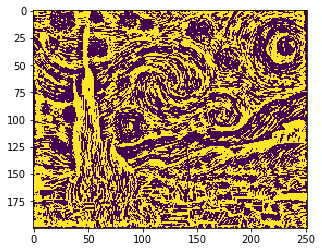

In [6]:
plt.imshow(bw)
plt.show()

In [7]:
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)

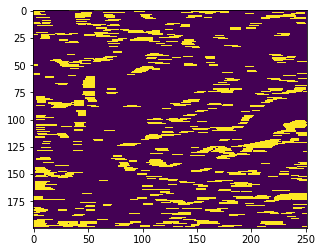

In [8]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
# Show extracted horizontal lines
plt.imshow(horizontal)
plt.show()

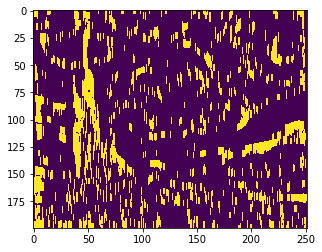

In [9]:
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
plt.imshow(vertical)
plt.show()

In [1]:
### upsample, downsample images

In [2]:
## Image Pyramids

In [3]:
# There are two common kinds of image pyramids:
# Gaussian pyramid: Used to downsample images
# Laplacian pyramid: Used to reconstruct an upsampled image from an image lower in the pyramid (with less resolution)

In [5]:
src = cv.imread('starry_night.jpg')

In [6]:
rows, cols, _channels = map(int, src.shape)

In [7]:
_channels

3

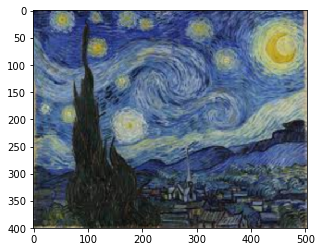

In [10]:
upsized = cv.pyrUp(src, dstsize=(2 * cols, 2 * rows))
plt.imshow(cv.cvtColor(upsized, cv.COLOR_BGR2RGB))
plt.show()

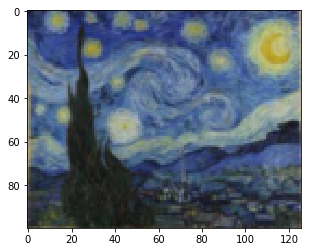

In [11]:
downsized = cv.pyrDown(src, dstsize=(cols // 2, rows // 2))
plt.imshow(cv.cvtColor(downsized, cv.COLOR_BGR2RGB))
plt.show()

### Thresholding

In [12]:
max_value = 255
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


In [13]:
max_binary_value = 255

In [14]:
threshold_value =150

In [28]:
_, dst = cv.threshold(src_gray, threshold_value, max_binary_value, type =3)

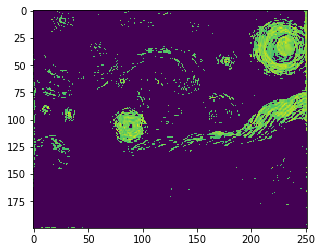

In [29]:
plt.imshow(dst)
plt.show()

In [30]:
### thresolding in range in HSV space

In [32]:
frame = cv.imread('starry_night.jpg')

In [40]:
max_value = 255
max_value_H = 360//2
low_H = 5
low_S = 60
low_V = 7
high_H = max_value_H
high_S = max_value
high_V = max_value

In [41]:
frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))

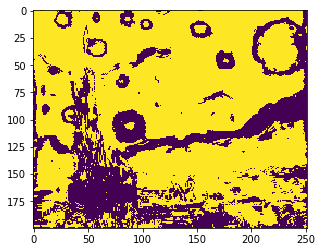

In [42]:
plt.imshow(frame_threshold)
plt.show()

In [43]:
### Normalized box filter

In [47]:
ddepth = -1 #indicates the depth of destination image will be same as source image

ind = 2

In [48]:
kernel_size = 3 + 2 * (ind % 5)
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
kernel /= (kernel_size * kernel_size)

dst = cv.filter2D(src, ddepth, kernel)

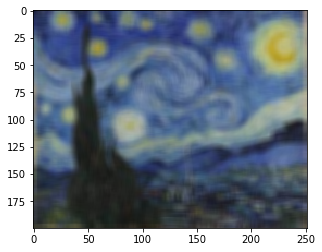

In [49]:
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

In [50]:
### Adding padding to the image

In [55]:
### constant padding, replication padding
from random import randint

In [52]:
borderType = cv.BORDER_CONSTANT

In [53]:
## % of padding 
top = int(0.05 * src.shape[0])  # shape[0] = rows
bottom = top
left = int(0.05 * src.shape[1])  # shape[1] = cols
right = left

In [56]:
value = [randint(0, 255), randint(0, 255), randint(0, 255)]
value

[218, 36, 19]

In [57]:
 dst = cv.copyMakeBorder(src, top, bottom, left, right, borderType, None, value)

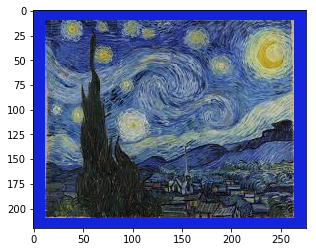

In [60]:
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

In [58]:
borderType = cv.BORDER_REPLICATE

In [59]:
 dst2 = cv.copyMakeBorder(src, top, bottom, left, right, borderType, None, value)

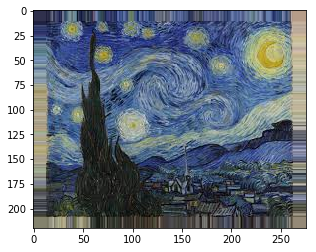

In [61]:
plt.imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
plt.show()